In [38]:
import fastf1
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

YEAR = 2025
DRIVERS = ['LEC', 'VER']
SESSION = 'Q'

season_summary = []

schedule = fastf1.get_event_schedule(YEAR, include_testing=False)
races = schedule[schedule['EventFormat'] != 'testing']['EventName'].tolist()

print(f"--- Start analysis on {len(races)} races ---")

for i, race_name in enumerate(races):
    print(f"[{i+1}/{len(races)}] {race_name}...", end=" ")
    
    try:
        #heavy load
        session = fastf1.get_session(YEAR, race_name, SESSION)
        session.load(telemetry=True, weather=False, messages=False)
        
        for driver in DRIVERS:
            try:
                #picks the fastest lap of every driver
                lap = session.laps.pick_driver(driver).pick_fastest()
                if lap is None: continue
                
                #telemetry retrieving with distance
                tel = lap.get_telemetry().add_distance()
                
                #speed telemetry inverted in order to make corners as peaks to evaluate
                inverted_speed = -tel['Speed'].values
                peaks, _ = find_peaks(inverted_speed, prominence=15, distance=50)
                
                for peak_idx in peaks:
                    #data at every peak
                    apex_row = tel.iloc[peak_idx]
                    apex_dist = apex_row['Distance']
                    
                    #traction
                    #look at the data from apex to apex+50meters
                    #use of boolean mask
                    mask_exit = (tel['Distance'] > apex_dist) & (tel['Distance'] < apex_dist + 50)
                    segment_exit = tel[mask_exit]
                    
                    if len(segment_exit) > 0:
                        #mean of throttle use in the segment
                        traction_score = segment_exit['Throttle'].mean()
                    else:
                        traction_score = 0
                        
                    #brake
                    #look at the data from apex-50 to apex
                    mask_entry = (tel['Distance'] > apex_dist - 50) & (tel['Distance'] < apex_dist)
                    segment_entry = tel[mask_entry]
                    
                    if len(segment_entry) > 0:
                        #brake force
                        v_start = segment_entry.iloc[0]['Speed']
                        v_end = apex_row['Speed']
                        braking_intensity = v_start - v_end
                    else:
                        braking_intensity = 0

                    #save only meaningful data
                    season_summary.append({
                        'Circuit': race_name,
                        'Driver': driver,
                        'Distance': apex_dist,
                        'Speed_Min': apex_row['Speed'],      #minimum speed
                        'Traction_Score': traction_score,    #corner exit
                        'Braking_Delta': braking_intensity   #corner entry
                    })
                    
            except Exception as e_drv:
                pass 
        
        #memory cleaning
        del session, tel, lap
        
    except Exception as e:
        print(f"Not raced")

#dataframe creation
df_season = pd.DataFrame(season_summary)

print("-" * 50)
print(f"Database generated with {len(df_season)} corners.")

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '4'


--- Start analysis on 24 races ---
[1/24] Australian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req   

[2/24] Chinese Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '1', '44', '16', '6', '12', '22', '23', '31', '27', '14', '18', '55', '10', '87', '7', '5', '30']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

[3/24] Japanese Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '6', '44', '23', '87', '10', '55', '14', '30', '22', '27', '5', '31', '7', '18']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

[4/24] Bahrain Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '16', '12', '10', '4', '1', '55', '44', '22', '7', '6', '14', '31', '23', '27', '30', '5', '18', '87']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


[5/24] Saudi Arabian Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '63', '16', '12', '55', '44', '22', '10', '4', '23', '30', '14', '6', '87', '18', '7', '27', '31', '5']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_da

[6/24] Miami Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '12', '81', '63', '55', '23', '16', '31', '22', '6', '44', '5', '7', '30', '27', '14', '10', '18', '87']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_

[7/24] Emilia Romagna Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '63', '4', '14', '55', '23', '18', '6', '10', '16', '44', '12', '5', '43', '30', '27', '31', '87', '22']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

[8/24] Monaco Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '44', '1', '6', '14', '31', '30', '23', '55', '22', '27', '63', '12', '5', '87', '10', '18', '43']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req  

[9/24] Spanish Grand Prix... 

core           INFO 	Finished loading data for 20 drivers: ['81', '4', '1', '63', '44', '12', '16', '10', '6', '14', '23', '5', '30', '18', '87', '27', '31', '55', '43', '22']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_s

[10/24] Canadian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '81', '12', '44', '14', '4', '16', '6', '23', '22', '43', '27', '87', '31', '5', '55', '18', '30', '10']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req 

[11/24] Austrian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '44', '63', '30', '1', '5', '12', '10', '14', '23', '6', '43', '87', '18', '31', '22', '55', '27']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req  

[12/24] British Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '63', '44', '16', '12', '87', '14', '10', '55', '22', '6', '23', '31', '30', '5', '18', '27', '43']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Belgian Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

[13/24] Belgian Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '16', '1', '23', '63', '22', '6', '30', '5', '31', '87', '10', '27', '55', '44', '43', '12', '14', '18']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

[14/24] Hungarian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '63', '14', '18', '5', '1', '30', '6', '87', '44', '55', '43', '12', '22', '10', '31', '27', '23']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req    

[15/24] Dutch Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '1', '6', '63', '16', '44', '30', '55', '14', '12', '22', '5', '10', '23', '43', '27', '31', '87', '18']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status

[16/24] Italian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '63', '12', '5', '14', '22', '87', '27', '55', '23', '31', '6', '18', '43', '10', '30']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
re

[17/24] Azerbaijan Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '30', '12', '63', '22', '4', '6', '81', '16', '14', '44', '5', '18', '87', '43', '27', '10', '23', '31']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req

[18/24] Singapore Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '81', '12', '4', '44', '16', '6', '87', '14', '27', '30', '22', '5', '18', '43', '31', '10', '23', '55']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'United States Grand Prix' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req   

[19/24] United States Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '63', '44', '81', '12', '87', '55', '14', '27', '30', '22', '10', '43', '5', '31', '18', '23', '6']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_st

[20/24] Mexico City Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '44', '63', '1', '12', '55', '81', '6', '87', '22', '31', '27', '14', '30', '5', '23', '10', '18', '43']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

[21/24] São Paulo Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['4', '12', '16', '81', '6', '63', '30', '87', '10', '27', '14', '23', '44', '18', '55', '1', '31', '43', '22', '5']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_stat

[22/24] Las Vegas Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '55', '63', '81', '30', '14', '6', '16', '10', '27', '18', '31', '87', '43', '23', '12', '5', '22', '44']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
events      WARNING 	Correcting user input 'Qatar Grand Prix' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached 

[23/24] Qatar Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '1', '63', '12', '6', '55', '14', '10', '16', '27', '30', '87', '5', '23', '22', '31', '44', '18', '43']
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req

[24/24] Abu Dhabi Grand Prix... 

req            INFO 	Using cached data for position_data
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '63', '16', '14', '5', '31', '6', '22', '87', '55', '30', '12', '18', '44', '23', '27', '10', '43']


--------------------------------------------------
Database generated with 283 corners.


/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/Users/lele/Desktop/F1_Analysis/venv/lib/python3.12/site-packages/fastf1/core.py:3081: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [39]:
print(df_season.head(60))

                     Circuit Driver     Distance  Speed_Min  Traction_Score  \
0      Australian Grand Prix    LEC   366.811573      190.0       95.479547   
1      Australian Grand Prix    LEC  1092.496165      103.0       68.717216   
2      Australian Grand Prix    LEC  1885.426625      237.0       97.230001   
3      Australian Grand Prix    LEC  3412.487839      252.0       99.008056   
4      Australian Grand Prix    LEC  4101.401077      118.0       73.145239   
5      Australian Grand Prix    LEC  4621.822301       96.0       63.672418   
6      Australian Grand Prix    VER   368.795382      193.0       98.083335   
7      Australian Grand Prix    VER  1094.231126      105.0       63.937895   
8      Australian Grand Prix    VER  1871.083454      236.0      100.000000   
9      Australian Grand Prix    VER  3382.297991      253.0      100.000000   
10     Australian Grand Prix    VER  4107.175696      120.0       75.327922   
11     Australian Grand Prix    VER  4610.219854    

--- CLUSTER MEANING ---
                           Speed_Min  Traction_Score  Braking_Delta
Cluster_Name                                                       
1. Slow (Traction)              83.5            55.3           65.6
2. Medium (Handling)            97.9            52.1           35.4
3. Fast (Downforce)            142.9            76.9           31.4
4. Power (Long straights)      207.0            92.5           17.9
--------------------------------------------------

--- LEC vs VER ---
Driver                     Delta_KMH
Cluster_Name                        
1. Slow (Traction)          0.369697
2. Medium (Handling)        4.067308
3. Fast (Downforce)        17.358586
4. Power (Long straights)  12.359954
--- FOUND OUTLIERS (Races to remove) ---
Driver                                               Delta_Check
Circuit                   Cluster_Name                          
Abu Dhabi Grand Prix      1. Slow (Traction)           16.500000
                          3. Fast (Down

/var/folders/n7/tq7fhqh50q5bfgpgt6409tf80000gn/T/ipykernel_17558/3456194856.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


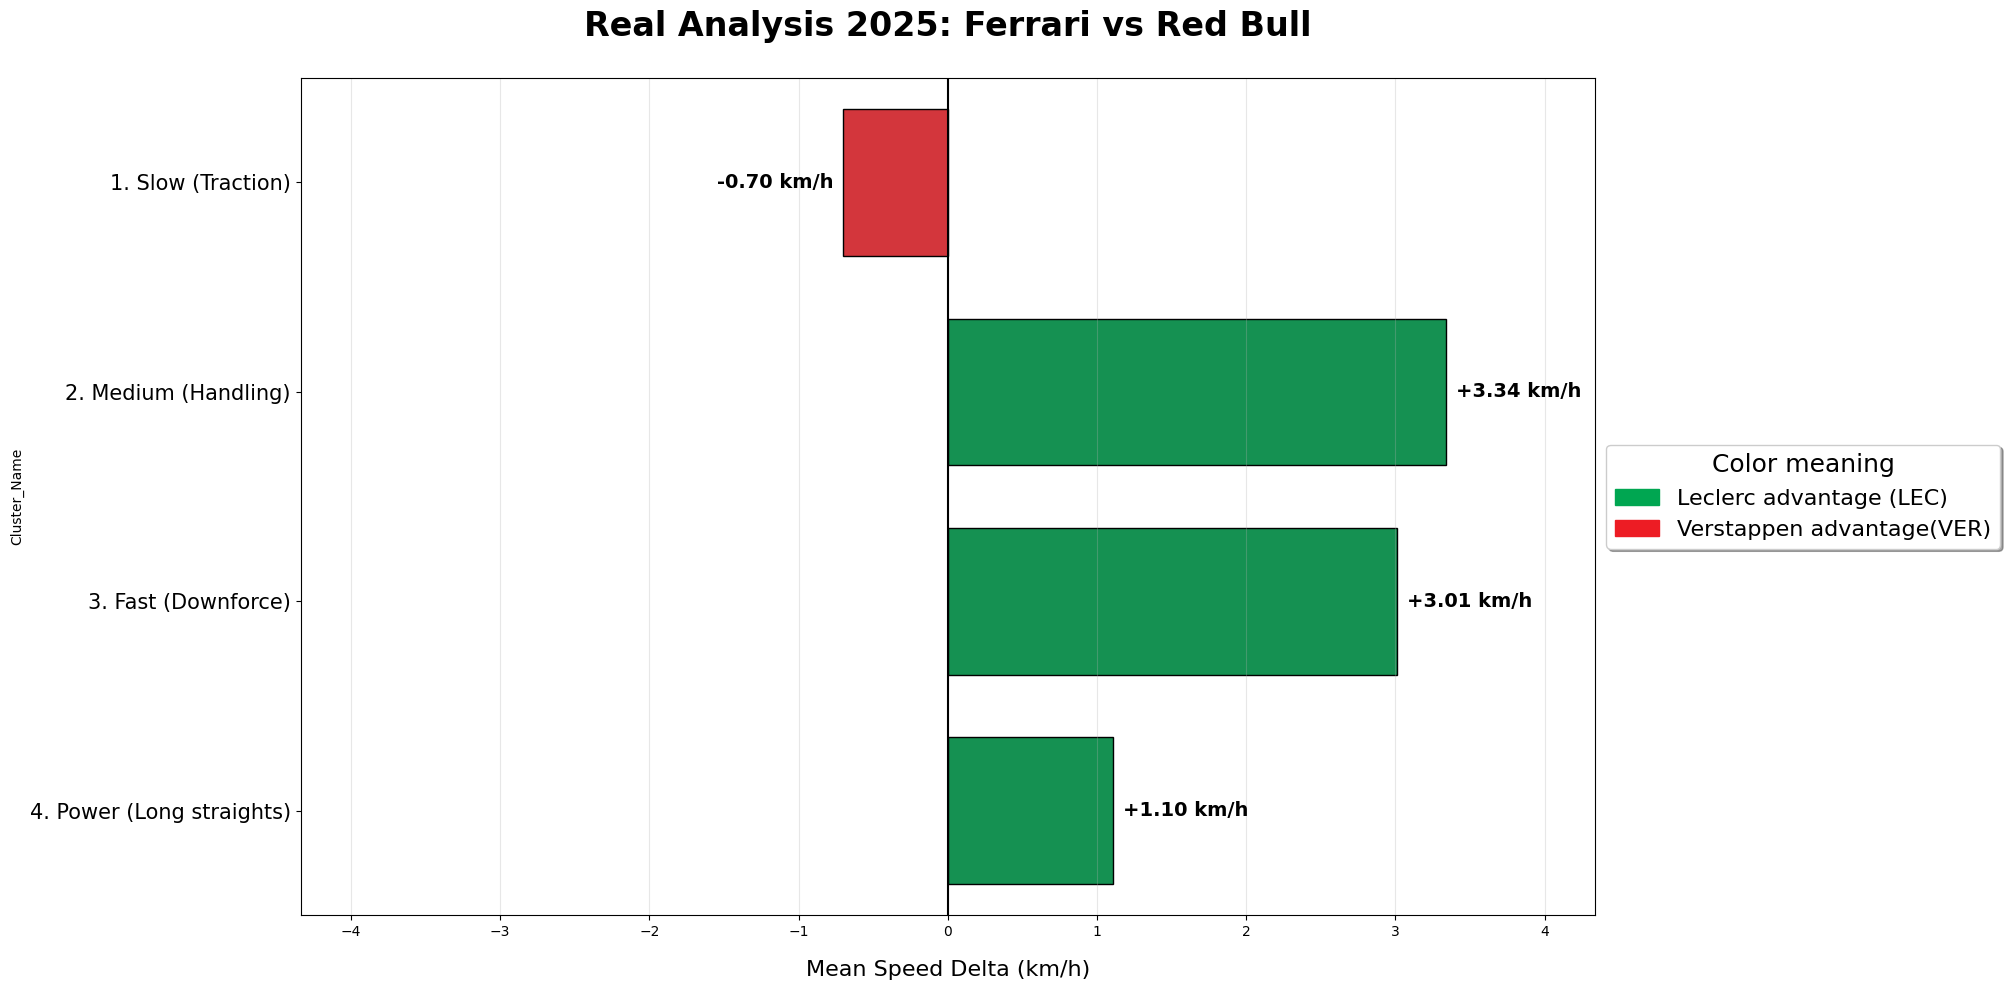

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#data preparation
#use the 3 extracted features
features = ['Speed_Min', 'Traction_Score', 'Braking_Delta']

#remove NaN rows
df_analysis = df_season.dropna(subset=features).copy()
X = df_analysis[features]

#standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-MEANS
#using k=4 to find 4 different clusters of corners
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_analysis['Cluster'] = kmeans.fit_predict(X_scaled)

#evaluating stats for every cluster, in order to name them
cluster_stats = df_analysis.groupby('Cluster')[features].mean()

#cluster ordering and naming
sorted_clusters = cluster_stats.sort_values('Speed_Min').index

#corner dictionary
cluster_names = {
    sorted_clusters[0]: '1. Slow (Traction)',       
    sorted_clusters[1]: '2. Medium (Handling)',       
    sorted_clusters[2]: '3. Fast (Downforce)',  
    sorted_clusters[3]: '4. Power (Long straights)'      
}

df_analysis['Cluster_Name'] = df_analysis['Cluster'].map(cluster_names)

# Phisycal characteristics
print("--- CLUSTER MEANING ---")
print(df_analysis.groupby('Cluster_Name')[features].mean().round(1))
print("-" * 50)

#gap evaluation
#group by cluster and mean evaluation
pivot = df_analysis.groupby(['Cluster_Name', 'Driver'])['Speed_Min'].mean().unstack()

# Delta = Leclerc - Verstappen
pivot['Delta_KMH'] = pivot['LEC'] - pivot['VER']

print("\n--- LEC vs VER ---")
print(pivot[['Delta_KMH']])


#DATA CLEANING

#Computation of delta for each row
cleaning_pivot = df_analysis.groupby(['Circuit', 'Cluster_Name', 'Driver'])['Speed_Min'].mean().unstack()

#Computation of raw delta
cleaning_pivot['Delta_Check'] = cleaning_pivot['LEC'] - cleaning_pivot['VER']

#Identification of outliers
#If the gap is >15km/h remove the entry
outliers = cleaning_pivot[abs(cleaning_pivot['Delta_Check']) > 15]

print("--- FOUND OUTLIERS (Races to remove) ---")
print(outliers[['Delta_Check']])

#Filter
#Removing of corners that generates impossible deltas
valid_data = cleaning_pivot[abs(cleaning_pivot['Delta_Check']) < 15].copy()

print(f"\nRemoved{len(outliers)} outliers.")

#Graph generation
import matplotlib.patches as mpatches

plt.figure(figsize=(20, 10))

final_gap = valid_data['Delta_Check'].groupby('Cluster_Name').mean()
colors = ['#00A651' if x >= 0 else '#ED1C24' for x in final_gap.values]

ax = sns.barplot(
    x=final_gap.values, 
    y=final_gap.index, 
    palette=colors,
    edgecolor='black',
    width=0.7
)

# Fix labels
max_val = max(abs(final_gap.values))
plt.xlim(-max_val * 1.3, max_val * 1.3)

#legend
green_patch = mpatches.Patch(color='#00A651', label='Leclerc advantage(LEC)')
red_patch = mpatches.Patch(color='#ED1C24', label='Verstappen advantage(VER)')

plt.legend(
    handles=[green_patch, red_patch], 
    loc='center left', 
    bbox_to_anchor=(1, 0.5), 
    title="Color meaning",
    fontsize=16,           
    title_fontsize=18,     
    frameon=True,          
    shadow=True            
)

#style settings
plt.title(f'Real Analysis {YEAR}: Ferrari vs Red Bull', fontsize=24, fontweight='bold', pad=30)
plt.xlabel('Mean Speed Delta (km/h)', fontsize=16, labelpad=15)
plt.yticks(fontsize=15)
plt.axvline(0, color='black', linewidth=1.5)
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(final_gap.values):
    offset = max_val * 0.02
    if v >= 0:
        ax.text(v + offset, i, f"{v:+.2f} km/h", va='center', ha='left', fontweight='bold', fontsize=14)
    else:
        ax.text(v - offset, i, f"{v:+.2f} km/h", va='center', ha='right', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(right=0.80) 
plt.show()

Drivers found: ['LEC' 'VER']
--> Heatmap generation: LEC vs VER
Graph data used: 45 corner/track combinations.


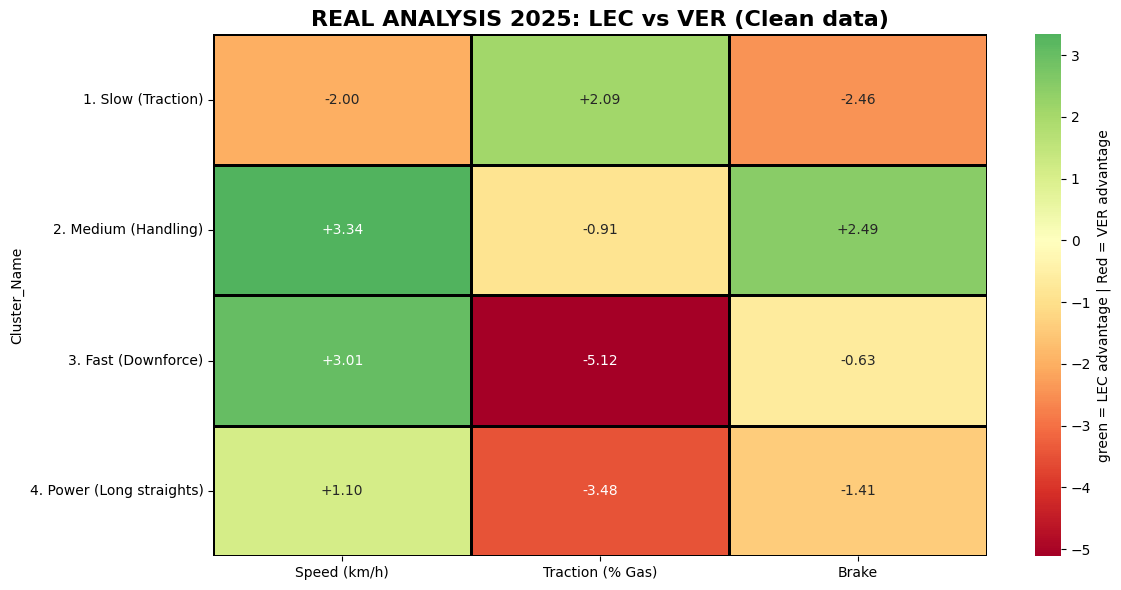

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#security check
if 'df_season' not in locals():
    print("ERROR: launch season harvester again")
else:
    #creation of a copy to work with
    df_work = df_season.dropna(subset=['Speed_Min', 'Traction_Score', 'Braking_Delta']).copy()
    
    #Driver rilevation
    drivers = df_work['Driver'].unique()
    print(f"Drivers found: {drivers}")
    
    if len(drivers) == 2:
        d1, d2 = drivers[0], drivers[1]
        print(f"--> Heatmap generation: {d1} vs {d2}")

        #clustering
        features = ['Speed_Min', 'Traction_Score', 'Braking_Delta']
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_work[features])
        kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
        df_work['Cluster'] = kmeans.fit_predict(X_scaled)
        
        stats = df_work.groupby('Cluster')['Speed_Min'].mean().sort_values()
        names = {
            stats.index[0]: '1. Slow (Traction)', 
            stats.index[1]: '2. Medium (Handling)',
            stats.index[2]: '3. Fast (Downforce)', 
            stats.index[3]: '4. Power (Long straights)'
        }
        df_work['Cluster_Name'] = df_work['Cluster'].map(names)

        #cleaning and preparation
        per_circuit = df_work.groupby(['Circuit', 'Cluster_Name', 'Driver'])[features].mean().unstack()
        
        #Rimotion of NaN
        per_circuit = per_circuit.dropna()
        
        #outliers filter (< 15 km/h diff)
        delta_speed = per_circuit[('Speed_Min', d1)] - per_circuit[('Speed_Min', d2)]
        valid_mask = abs(delta_speed) <= 15
        final_data = per_circuit[valid_mask]
        
        print(f"Graph data used: {len(final_data)} corner/track combinations.")

        if len(final_data) > 0:
            cluster_means = final_data.groupby('Cluster_Name').mean()
            
            delta_matrix = pd.DataFrame()
            delta_matrix['Speed (km/h)'] = cluster_means[('Speed_Min', d1)] - cluster_means[('Speed_Min', d2)]
            delta_matrix['Traction (% Gas)'] = cluster_means[('Traction_Score', d1)] - cluster_means[('Traction_Score', d2)]
            delta_matrix['Brake'] = cluster_means[('Braking_Delta', d1)] - cluster_means[('Braking_Delta', d2)]
            
            plt.figure(figsize=(12, 6))
            sns.heatmap(
                delta_matrix, 
                annot=True, 
                fmt="+.2f", 
                cmap='RdYlGn', 
                center=0, 
                linewidths=1, 
                linecolor='black',
                cbar_kws={'label': f'green = {d1} advantage | Red = {d2} advantage'}
            )
            plt.title(f'REAL ANALYSIS 2025: {d1} vs {d2} (Clean data)', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()
        else:
            print("no valid data left")
    else:
        print("You need exactly 2 drivers")